## <center>PLA 学习 </center>

### 背景知识

- **矢量相加**
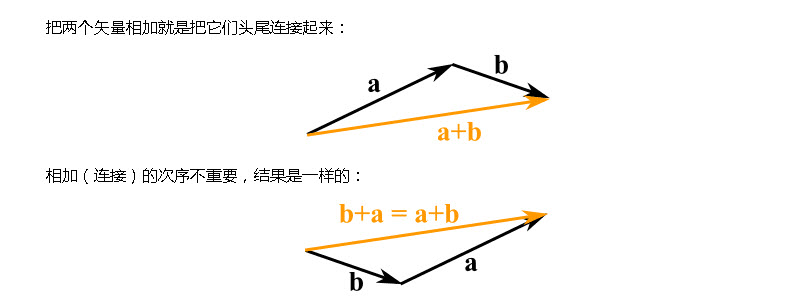
- **矢量相减**
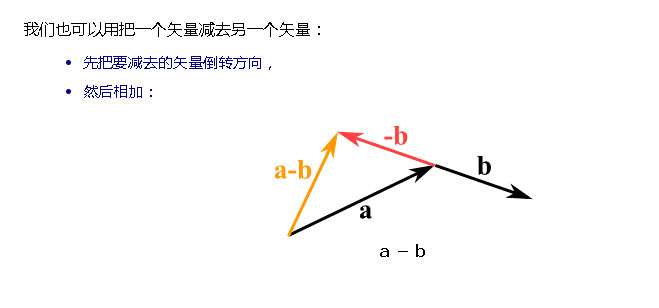  

矢量的加减法直接把相应的坐标进行加减法即可， 例如(3,1)+(-1,2)=(2,3)如下图所示
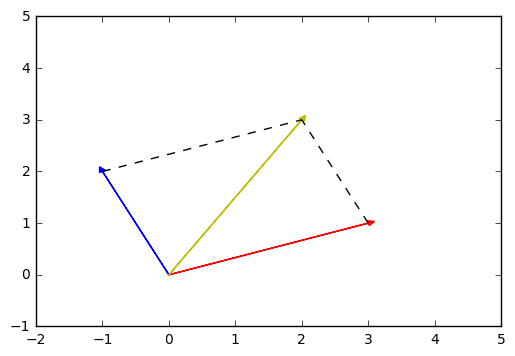
- **法向量相关知识**
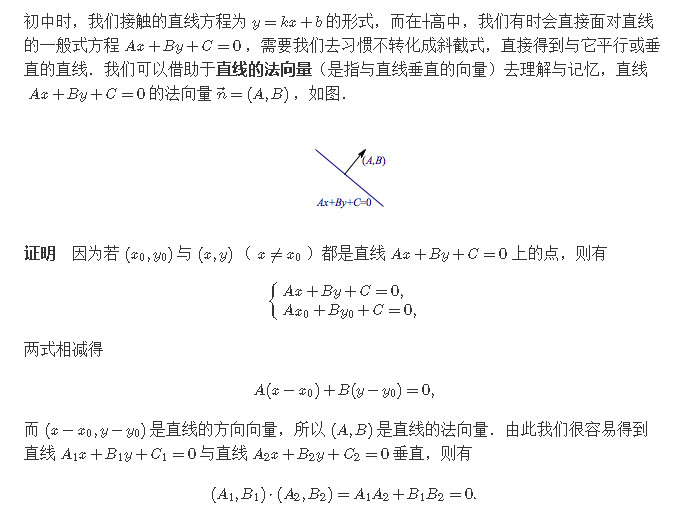

- 参考文章  
    [法向量相关知识](http://lanqi.org/skills/19873/)  
    [矢量](https://www.shuxuele.com/algebra/vectors.html)

### PLA 原理
图中拿二维平面举例，变量 $x_i$ 为客户的特征，每个客户特征的集合为平面中的一个点。当 $h(x)$ 的输出大于0时，表示点在直线的一侧，如果输出小于0，则表示点位于直线的另一侧
  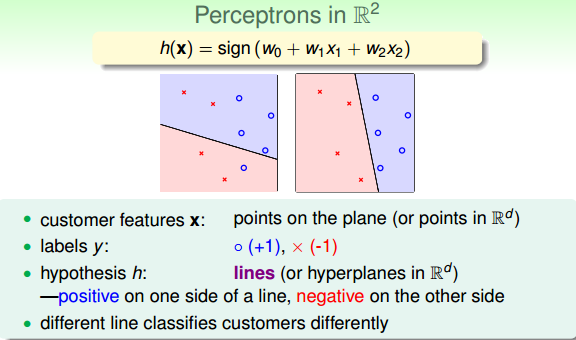

例如 $h(x) = 2 x_1 - x_2 + 1$， 对于点(3,5)， h(x)=2，在直线的右侧。对于点（0,5），h(x) = -4，其在直线的左侧。
  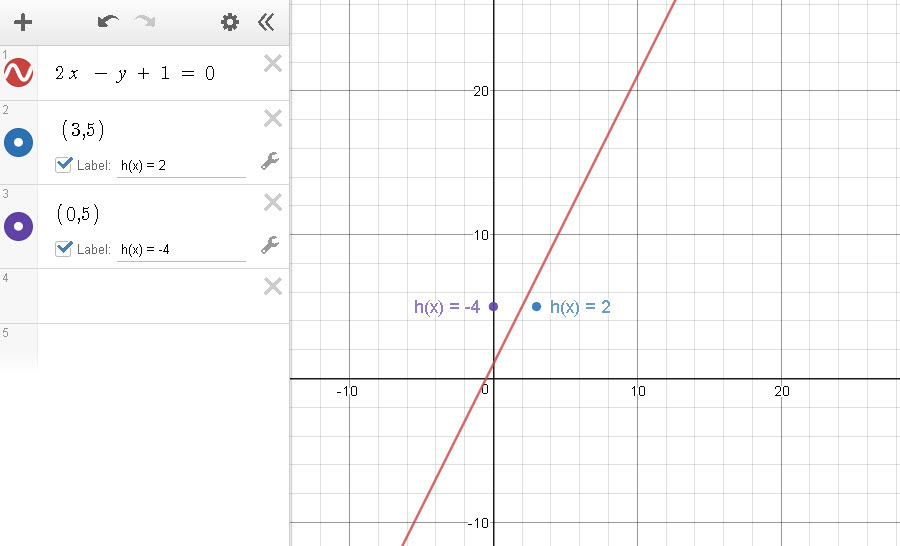


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import operator

In [57]:
#定义训练函数
def myFun(group, labels):
    fig, ax = plt.subplots()
    # 画出数据点
    for i in range(len(group)):
        if labels[i] == 1:
            plt.plot(group[i][0],group[i][1],'ro')
        else:
            plt.plot(group[i][0],group[i][1],'bp')
            x = np.arange(-2,5,0.1)
    # 样本集大小
    length = len(group)
    w = np.array([0.0,0.0])
    lastW = w
    b = 0
    lastB = b
    count = 0
    # 学习率
    alpha = 1
    m = 0
    while m<length:
        if(np.dot(group[m],w)+b)*labels[m]<=0:
            w += alpha * labels[m] * group[m]
            b += alpha * labels[m]
            print(w)
            print(b)
            m=0
            count = count + 1
        else:
            m+=1
        
        if w.all()!=lastW.all() or lastB!= b :
            y = (-w[0]*x-b)/w[1]
            plt.plot(x,y,label=count)
        lastB = b
        lastW = w

    plt.plot([0, 0],[-5, 5],'k--')
    plt.plot([-5, 5],[0, 0],'k--')
    plt.plot([-2, 3],[-2,3],'b--')
    plt.axis("equal")
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    plt.title("PLA")        
    plt.legend()
    plt.show()
    return w, b

[-3. -3.]
-1
[-2. -1.]
0
[-1.  1.]
1
[-4. -2.]
0
[-3.  0.]
1
[-2.  2.]
2
[-5. -1.]
1
[-4.  1.]
2
[-3.  3.]
3
[-6.  0.]
2
[-5.  2.]
3


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


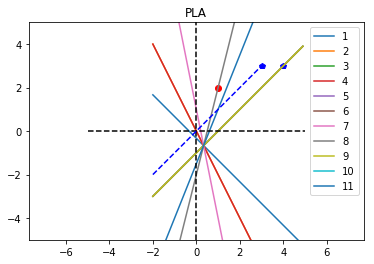

In [58]:
group = np.array([[3,3],[4,3],[1,2]])
labels = np.array([-1,-1,1])
w,b = myFun(group,labels)

### 几组测试结果
- 对于同一组数据，如果把标签由1改为-1，那还是同一条直线吗?  
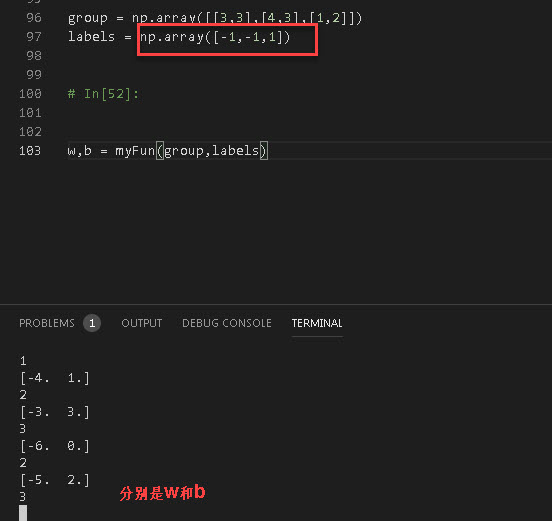  
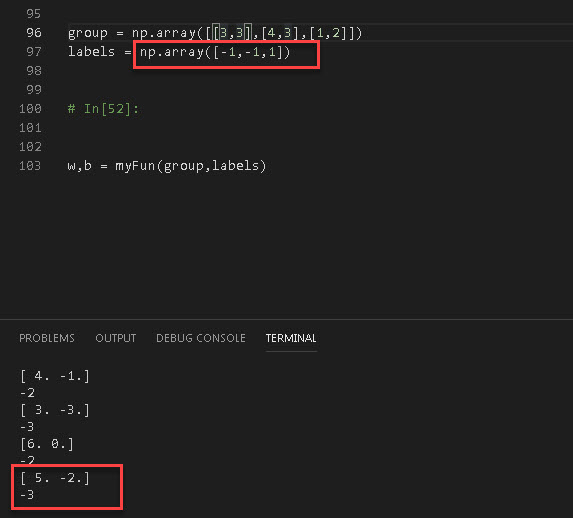 
 上述测试代码可知，当把Label值设置相反的数据时，尽管其在坐标轴上是同一条直线，但法向量的方向是不一样的。

### 一些疑问   
- 初始点是如果更新权重的  
    对于初始值，由于w和b的初始参数都为0，所以第一个点认为是错误的数据。第一条直线是以第一个点作为法向量的点。  


- 如何解释参数b(截距)的更新?